In [16]:
!pip install -Uqq ipdb
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import ipdb
import statistics
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import files

In [18]:
# download video-data

def upload_files_recursively(path, data, filter):
    for root, dirs, files in os.walk(path):
        for file in files:
            if filter(file):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    jsonData = json.load(f)
                    jsonData['name'] = file

                    video_id = ''
                    try:
                      video_id = jsonData['video_id']
                    except:
                      print('    ERROR OCCURED: ' + file)
                      continue
                    # ipdb.set_trace(context=1)
                    print(video_id + ' : ' + file)
                    data.append(jsonData)

In [19]:
FEDfilter = lambda file: file.endswith('.json')
expertData = []
resData = pd.DataFrame(columns=['id', 'time'])
upload_files_recursively('/content/experts/', expertData, FEDfilter)

expertData = sorted(expertData, key=lambda a: a['name'])



# print('-' * 32)
# ids = []

# for v in expertData:
#   ids.append({ 'id':v['video_id'], 'date':v['name'][:6] })
#   print(v['name'])

# resData = pd.DataFrame(ids, columns=['id', 'date'])
# resData = resData.set_index('id')

# resData

840207c0-702c-482e-aef2-903a5f0970fb : 170324-watchv=BivvfOofwiE&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=39_840207c0-702c-482e-aef2-903a5f0970fb.json
06897558-d0b4-4cbf-b57a-5faf070fed30 : 181214-watchv=cw_s5DgwMxU&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=32_06897558-d0b4-4cbf-b57a-5faf070fed30.json
61899012-04de-42cc-8af0-80bd3ce99cb4 : 180914-watchv=EO0ngv_oLIg&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=33_61899012-04de-42cc-8af0-80bd3ce99cb4.json
d0676316-2956-42e7-b6a8-90277a62bbdd : 190322-watchv=q-Zw5jBfB8M&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=31_d0676316-2956-42e7-b6a8-90277a62bbdd.json
f946b729-a4b6-4358-971b-55835e585cda : 161216-watchv=4MCcx_ZsqJU&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=40_f946b729-a4b6-4358-971b-55835e585cda.json
d1abc5e4-a2bb-4baf-b950-17865f4b568f : 170616-watchv=cwChTWU8hnA&list=PLQocLHHmkYbCsWDJphENzmIqMcrcU-SxD&index=38_d1abc5e4-a2bb-4baf-b950-17865f4b568f.json


# Analysis for one video:

In [20]:
def analysis_for_one_video():

  for video in expertData:
    # confidence
    values_confidence = []
    conf = video['confidence']
    id = video['video_id']

    if conf is not None:
      for piece in conf:
        try:
          values_confidence.append(float(piece['confidence']))
        except:
          print('Error value: ' + piece['confidence'] + ' | id: ' + id)
    else:
      print('there is none')

    if len(values_confidence) > 0:
      resData.loc[id, 'conf_avg'] = sum(values_confidence) / len(values_confidence)
      resData.loc[id, 'conf_max'] = max(values_confidence)
      resData.loc[id, 'conf_min'] = min(values_confidence)
      resData.loc[id, 'conf_median'] = statistics.median(values_confidence)
    else:
      print('empty video: ' + id)

    # congruence
    values_congruence = []
    cngr = video['congruence']
    id = video['video_id']

    if cngr is not None:
      for piece in cngr:
        try:
          values_congruence.append(float(piece['congruence']))
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)
    else:
      print('there is none')

    if len(values_congruence) > 0:
      resData.loc[id, 'cngr_avg'] = sum(values_congruence) / len(values_congruence)
      resData.loc[id, 'cngr_max'] = max(values_congruence)
      resData.loc[id, 'cngr_min'] = min(values_congruence)
      resData.loc[id, 'cngr_median'] = statistics.median(values_congruence)
    else:
      print('empty video: ' + id)

    # aggression
    try:
      emotions = video['emotions'][0]
      agr_div = video['aggression_divided']
      agr_agg = video['aggression_aggregated']
    except Exception as e:
      print(f'aggression. videoId = {video["video_id"]} Exception: {e}')

    id = video['video_id']

    emotions_video_anger_vals = []
    emotions_video_neutral_vals = []
    emotions_video_happiness_vals = []

    emotions_audio_anger_vals = []
    emotions_audio_neutral_vals = []
    emotions_audio_happiness_vals = []

    emotions_text_anger_vals = []
    emotions_text_neutral_vals = []
    emotions_text_happiness_vals = []

    if emotions is not None:
      for piece in emotions['video']:
        try:
          emotions_video_anger_vals.append(piece['video_anger'])
          emotions_video_neutral_vals.append(piece['video_neutral'])
          emotions_video_happiness_vals.append(piece['video_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)


      for piece in emotions['audio']:
        try:
          emotions_audio_anger_vals.append(piece['audio_anger'])
          emotions_audio_neutral_vals.append(piece['audio_neutral'])
          emotions_audio_happiness_vals.append(piece['audio_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)


      for piece in emotions['text']:
        try:
          emotions_text_anger_vals.append(piece['text_anger'])
          emotions_text_neutral_vals.append(piece['text_neutral'])
          emotions_text_happiness_vals.append(piece['text_happiness'])
        except:
          print('Error value: ' + piece['congruence'] + ' | id: ' + id)

    else:
      print('there is none')

    resData.loc[id, 'vid_anger_avg'] = sum(emotions_video_anger_vals) / len(emotions_video_anger_vals)
    resData.loc[id, 'vid_neutral_avg'] = sum(emotions_video_neutral_vals) / len(emotions_video_neutral_vals)
    resData.loc[id, 'vid_happiness_avg'] = sum(emotions_video_happiness_vals) / len(emotions_video_happiness_vals)

    resData.loc[id, 'aud_anger_avg'] = sum(emotions_audio_anger_vals) / len(emotions_audio_anger_vals)
    resData.loc[id, 'aud_neutral_avg'] = sum(emotions_audio_neutral_vals) / len(emotions_audio_neutral_vals)
    resData.loc[id, 'aud_happiness_avg'] = sum(emotions_audio_happiness_vals) / len(emotions_audio_happiness_vals)
    
    resData.loc[id, 'txt_anger_avg'] = sum(emotions_text_anger_vals) / len(emotions_text_anger_vals)
    resData.loc[id, 'txt_neutral_avg'] = sum(emotions_text_neutral_vals) / len(emotions_text_neutral_vals)
    resData.loc[id, 'txt_happiness_avg'] = sum(emotions_text_happiness_vals) / len(emotions_text_happiness_vals)

    

In [21]:
resData.tail()

,id,time


------------------------------------------------------------------

# Data preparation

In [22]:
def enrich_with_confidence(res_df, expt_data):
  print('confidence. id = ' + expt_data['video_id'])
  conf = pd.DataFrame(expt_data['confidence'])
  res_df['time_sec_conf'] = conf['time_sec']
  res_df['conf'] = conf['confidence']


def enrich_with_congruence(res_df, expt_data):
  print('congruence. id = ' + expt_data['video_id'])
  congr = pd.DataFrame(expt_data['congruence'])
  res_df['time_sec_congr'] = congr['time_sec']
  res_df['congr'] = congr['congruence']


def enrich_with_aggression(res_df, expt_data):
  print('aggression. id = ' + expt_data['video_id'])
  aggr_video = pd.DataFrame(expt_data['aggression_divided'][0]['audio'])
  res_df['time_sec_aggr'] = aggr_video['time_sec']
  res_df['aggr_a_volume'] = aggr_video['volume']
  res_df['aggr_a_temp'] = aggr_video['temp'] / 1000

In [23]:
def enrich_with_market_data(res_df):

  ticker = 'RTSI'
  time_mkt_start = 150000
  time_mkt_end = 160000

  time_marker_for_previous_value = None

  for index, row in res_df.iterrows():
    date = row['date']
    mrk = pd.read_csv(f'/content/market/{ticker}_{date}_{date}.csv', sep=',')

    mkt_with_time_sec = mrk.loc[(mrk['<TIME>'] > time_mkt_start) & (mrk['<TIME>'] < time_mkt_end)]
    init_mkt_value = mkt_with_time_sec.iloc[0]['<CLOSE>']

    minuteFromVideo = int(row['time_sec'] / 60)
    timeFromMkt = int(f'150{minuteFromVideo}00') if minuteFromVideo < 10 else int(f'15{minuteFromVideo}00')
    
    mkt_value_at_time_df = mkt_with_time_sec.loc[(mkt_with_time_sec['<TIME>'] == timeFromMkt)]['<CLOSE>']

    try:
      mktValueAtTime = float(mkt_value_at_time_df)
    except Exception as e:
      print(f'id={video_data["video_id"]} time_sec={row["time_sec"]} minuteFromVideo={minuteFromVideo} timeFromMkt={timeFromMkt} mktValueAtTimeDf={mktValueAtTimeDf}')
      print(e)

    rel_mkt_value = mktValueAtTime / init_mkt_value
    
    if time_marker_for_previous_value is None:
      time_marker_for_previous_value = rel_mkt_value

    res_df.loc[index, f'{ticker}-value'] = rel_mkt_value
    res_df.loc[index, f'{ticker}-init-value'] = init_mkt_value
    res_df.loc[index, f'{ticker}-change-value'] = time_marker_for_previous_value / rel_mkt_value

    time_marker_for_previous_value = rel_mkt_value



In [24]:
time_expt_start = 0
time_expt_end = 3600

result_data = pd.DataFrame()

for video_data in expertData:

  print('video id: ' + video_data['video_id'] + ' date: ' + video_data['name'][:6])
  expt_videos_emotions = pd.DataFrame(video_data['emotions'][0]['video'])
  expt_videos_emotions['date'] = video_data['name'][:6]
  expt_videos_emotions = expt_videos_emotions.loc[(expt_videos_emotions['time_sec'] > time_expt_start) & (expt_videos_emotions['time_sec'] < time_expt_end)]

  filTfdata = expt_videos_emotions[expt_videos_emotions['video_anger'] != 0]

  divided_by_minute_expt_data = filTfdata[filTfdata['time_sec'] % 60 == 0]
  divided_by_minute_expt_data = divided_by_minute_expt_data.interpolate(method='linear', limit_direction='both')

  # enriching
  enrich_with_confidence(divided_by_minute_expt_data, video_data)
  enrich_with_congruence(divided_by_minute_expt_data, video_data)
  enrich_with_aggression(divided_by_minute_expt_data, video_data)

  enrich_with_market_data(divided_by_minute_expt_data)

  result_data = pd.concat([result_data, divided_by_minute_expt_data])


result_data

video id: f946b729-a4b6-4358-971b-55835e585cda date: 161216
confidence. id = f946b729-a4b6-4358-971b-55835e585cda
congruence. id = f946b729-a4b6-4358-971b-55835e585cda
aggression. id = f946b729-a4b6-4358-971b-55835e585cda
video id: 840207c0-702c-482e-aef2-903a5f0970fb date: 170324
confidence. id = 840207c0-702c-482e-aef2-903a5f0970fb
congruence. id = 840207c0-702c-482e-aef2-903a5f0970fb
aggression. id = 840207c0-702c-482e-aef2-903a5f0970fb
video id: d1abc5e4-a2bb-4baf-b950-17865f4b568f date: 170616
confidence. id = d1abc5e4-a2bb-4baf-b950-17865f4b568f
congruence. id = d1abc5e4-a2bb-4baf-b950-17865f4b568f
aggression. id = d1abc5e4-a2bb-4baf-b950-17865f4b568f
video id: 61899012-04de-42cc-8af0-80bd3ce99cb4 date: 180914
confidence. id = 61899012-04de-42cc-8af0-80bd3ce99cb4
congruence. id = 61899012-04de-42cc-8af0-80bd3ce99cb4
aggression. id = 61899012-04de-42cc-8af0-80bd3ce99cb4
video id: 06897558-d0b4-4cbf-b57a-5faf070fed30 date: 181214
confidence. id = 06897558-d0b4-4cbf-b57a-5faf070fed3

,video_path,time_sec,video_anger,video_neutral,video_happiness,date,time_sec_conf,conf,time_sec_congr,congr,time_sec_aggr,aggr_a_volume,aggr_a_temp,RTSI-value,RTSI-init-value,RTSI-change-value
4,upload_file/f946b729-a4b6-4358-971b-55835e585c...,60,0.360367,0.331267,0.308366,161216,60.0,0.642279,60.0,0.103482,60.0,0.10623,0.104167,1.000000,1143.25,1.000000
10,upload_file/f946b729-a4b6-4358-971b-55835e585c...,120,0.338625,0.344251,0.317124,161216,120.0,0.641735,120.0,0.106682,120.0,0.06744,0.125000,1.000122,1143.25,0.999878
16,upload_file/f946b729-a4b6-4358-971b-55835e585c...,180,0.346417,0.338230,0.315354,161216,180.0,0.640527,180.0,0.107133,180.0,0.08227,0.117188,0.999869,1143.25,1.000254
22,upload_file/f946b729-a4b6-4358-971b-55835e585c...,240,0.336224,0.340427,0.323349,161216,240.0,0.641018,250.0,0.215511,240.0,0.06056,0.125000,1.000192,1143.25,0.999676
28,upload_file/f946b729-a4b6-4358-971b-55835e585c...,300,0.341290,0.341256,0.317454,161216,292.0,0.649487,310.0,0.100527,292.0,0.07380,0.117188,1.001198,1143.25,0.998995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2520,0.342042,0.332794,0.325164,190322,2716.0,0.647562,NaN,NaN,2716.0,0.21417,0.133929,0.998709,1223.78,0.999722
225,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2580,0.348041,0.328289,0.323671,190322,2766.0,0.650872,NaN,NaN,2766.0,0.19373,0.133929,0.998913,1223.78,0.999795
231,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2640,0.346782,0.331017,0.322201,190322,2826.0,0.648663,NaN,NaN,2826.0,0.17339,0.133929,0.999395,1223.78,0.999518
239,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2760,0.350794,0.326998,0.322208,190322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999387,1223.78,1.000008


## First try

In [25]:
# ticker = 'RTSI'
# time_start = 150000
# time_end = 160000

# mrk = pd.read_csv('/content/market/RTSI_161216_161216.csv', sep=',')

# # enriching with emotions
# filtered_expert = [x for x in expertData if x['video_id'] == 'f946b729-a4b6-4358-971b-55835e585cda'][0]

# expt_videos_emotions = pd.DataFrame(filtered_expert['emotions'][0]['video'])

# mkt_with_time_sec = mrk.loc[(mrk['<TIME>'] > time_start) & (mrk['<TIME>'] < time_end)]

# filTfdata = expt_videos_emotions[expt_videos_emotions['video_anger'] != 0]

# divided_by_minute_expt_data = filTfdata[filTfdata['time_sec'] % 60 == 0]
# divided_by_minute_expt_data = divided_by_minute_expt_data.interpolate(method='linear', limit_direction='both')


# # enriching
# enrich_with_confidence(divided_by_minute_expt_data, filtered_expert)
# enrich_with_congruence(divided_by_minute_expt_data, filtered_expert)
# enrich_with_aggression(divided_by_minute_expt_data, filtered_expert)
# # end of enriching

# for index, row in divided_by_minute_expt_data.iterrows():

#   minuteFromVideo = int(row['time_sec'] / 60)
#   timeFromMkt = int(f'150{minuteFromVideo}00') if minuteFromVideo < 10 else int(f'15{minuteFromVideo}00')
#   mktValueAtTimeDf = mkt_with_time_sec.loc[(mkt_with_time_sec['<TIME>'] == timeFromMkt)]['<CLOSE>']
  
#   try:
#     mktValueAtTime = float(mktValueAtTimeDf)
#   except Exception as e:
#     print(f'time_sec={row["time_sec"]} minuteFromVideo={minuteFromVideo} timeFromMkt={timeFromMkt} mktValueAtTimeDf={mktValueAtTimeDf}')
#     print(e)
#   # print(mktValueAtTime)

#   divided_by_minute_expt_data.loc[index, f'{ticker}-value'] = mktValueAtTime

## Model building based on 1 video

In [26]:
result_data

,video_path,time_sec,video_anger,video_neutral,video_happiness,date,time_sec_conf,conf,time_sec_congr,congr,time_sec_aggr,aggr_a_volume,aggr_a_temp,RTSI-value,RTSI-init-value,RTSI-change-value
4,upload_file/f946b729-a4b6-4358-971b-55835e585c...,60,0.360367,0.331267,0.308366,161216,60.0,0.642279,60.0,0.103482,60.0,0.10623,0.104167,1.000000,1143.25,1.000000
10,upload_file/f946b729-a4b6-4358-971b-55835e585c...,120,0.338625,0.344251,0.317124,161216,120.0,0.641735,120.0,0.106682,120.0,0.06744,0.125000,1.000122,1143.25,0.999878
16,upload_file/f946b729-a4b6-4358-971b-55835e585c...,180,0.346417,0.338230,0.315354,161216,180.0,0.640527,180.0,0.107133,180.0,0.08227,0.117188,0.999869,1143.25,1.000254
22,upload_file/f946b729-a4b6-4358-971b-55835e585c...,240,0.336224,0.340427,0.323349,161216,240.0,0.641018,250.0,0.215511,240.0,0.06056,0.125000,1.000192,1143.25,0.999676
28,upload_file/f946b729-a4b6-4358-971b-55835e585c...,300,0.341290,0.341256,0.317454,161216,292.0,0.649487,310.0,0.100527,292.0,0.07380,0.117188,1.001198,1143.25,0.998995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2520,0.342042,0.332794,0.325164,190322,2716.0,0.647562,NaN,NaN,2716.0,0.21417,0.133929,0.998709,1223.78,0.999722
225,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2580,0.348041,0.328289,0.323671,190322,2766.0,0.650872,NaN,NaN,2766.0,0.19373,0.133929,0.998913,1223.78,0.999795
231,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2640,0.346782,0.331017,0.322201,190322,2826.0,0.648663,NaN,NaN,2826.0,0.17339,0.133929,0.999395,1223.78,0.999518
239,upload_file/d0676316-2956-42e7-b6a8-90277a62bb...,2760,0.350794,0.326998,0.322208,190322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999387,1223.78,1.000008


In [27]:
result_data.head()

,video_path,time_sec,video_anger,video_neutral,video_happiness,date,time_sec_conf,conf,time_sec_congr,congr,time_sec_aggr,aggr_a_volume,aggr_a_temp,RTSI-value,RTSI-init-value,RTSI-change-value
4,upload_file/f946b729-a4b6-4358-971b-55835e585c...,60,0.360367,0.331267,0.308366,161216,60.0,0.642279,60.0,0.103482,60.0,0.10623,0.104167,1.000000,1143.25,1.000000
10,upload_file/f946b729-a4b6-4358-971b-55835e585c...,120,0.338625,0.344251,0.317124,161216,120.0,0.641735,120.0,0.106682,120.0,0.06744,0.125000,1.000122,1143.25,0.999878
16,upload_file/f946b729-a4b6-4358-971b-55835e585c...,180,0.346417,0.338230,0.315354,161216,180.0,0.640527,180.0,0.107133,180.0,0.08227,0.117188,0.999869,1143.25,1.000254
22,upload_file/f946b729-a4b6-4358-971b-55835e585c...,240,0.336224,0.340427,0.323349,161216,240.0,0.641018,250.0,0.215511,240.0,0.06056,0.125000,1.000192,1143.25,0.999676
28,upload_file/f946b729-a4b6-4358-971b-55835e585c...,300,0.341290,0.341256,0.317454,161216,292.0,0.649487,310.0,0.100527,292.0,0.07380,0.117188,1.001198,1143.25,0.998995


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', 'RTSI-change-value'], axis=1)

to_predict = cleared_result_data.loc[result_data['video_path'] == 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']
train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']

X = train_for_prediction.drop(['video_path', 'RTSI-value'], axis=1)
y = train_for_prediction[['RTSI-value']]

to_predict = to_predict.drop(['RTSI-value', 'video_path'], axis=1)
to_predict = to_predict.interpolate(method='linear', limit_direction='both')
to_predict = to_predict.iloc[:-2]

X.replace('No face', np.nan, inplace=True)
X = X.interpolate(method='linear', limit_direction='both')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# # Train the model
# print('Linear regression')
# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# Train the model
print('Polynomial regression')
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_test_poly)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# # Train the model
# print('Ridge regression')
# ridge = Ridge(alpha=0.1)
# ridge.fit(X_train, y_train)

# y_pred = ridge.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# # Train the model
# print('Lasso regression')
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)

# y_pred = lasso.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

# # Train the model
# print('Elastic Net regression')
# elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic_net.fit(X_train, y_train)

# y_pred = elastic_net.predict(X_test)

# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

# print('-' * 40)

Polynomial regression
Mean Squared Error: 4.492019481837218e-06
Mean Absolute Error: 0.0016667604036139504
R-squared: -2.9847251208523167
----------------------------------------


In [37]:
y_pred

array([[1.00390625],
       [0.99658203],
       [1.00195312],
       [1.00341797],
       [1.00146484],
       [1.00390625],
       [0.99853516],
       [1.00195312],
       [1.00048828],
       [1.00146484],
       [1.00048828],
       [1.00537109],
       [1.00341797],
       [1.00048828],
       [1.00146484],
       [1.00390625],
       [1.        ],
       [1.00292969],
       [0.99902344]])

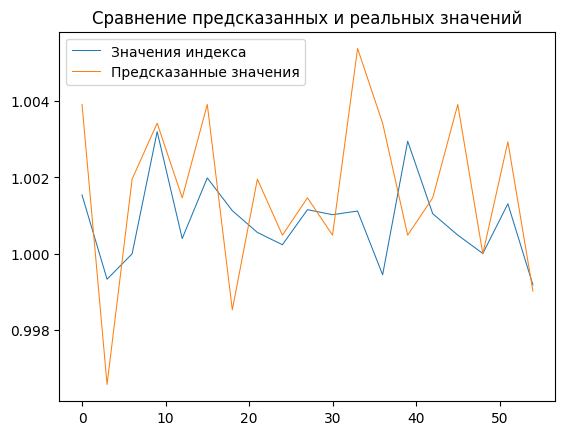

In [38]:
time = np.arange(0,57,3)
plt.plot(time, y_test, linewidth=0.75, label='Значения индекса')
plt.plot(time, y_pred, linewidth=0.75, label='Предсказанные значения')

plt.title('Сравнение предсказанных и реальных значений')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

cleared_result_data = result_data.drop(['date', 'time_sec', 'time_sec_conf', 'time_sec_congr', 'time_sec_aggr', 'RTSI-init-value', 'RTSI-value'], axis=1)

to_predict = cleared_result_data.loc[result_data['video_path'] == 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']
train_for_prediction = cleared_result_data.loc[result_data['video_path'] != 'upload_file/d0676316-2956-42e7-b6a8-90277a62bbdd.mp4']

X = train_for_prediction.drop(['video_path', 'RTSI-change-value'], axis=1)
y = train_for_prediction[['RTSI-change-value']]

to_predict = to_predict.drop(['RTSI-change-value', 'video_path'], axis=1)
to_predict = to_predict.interpolate(method='linear', limit_direction='both')
to_predict = to_predict.iloc[:-2]

X.replace('No face', np.nan, inplace=True)
X = X.interpolate(method='linear', limit_direction='both')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# Train the model
print('Linear regression')
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Polynomial regression')
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_test_poly)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Ridge regression')
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

# Train the model
print('Lasso regression')
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)


# Train the model
print('Elastic Net regression')
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

print('-' * 40)

Linear regression
Mean Squared Error: 1.2061389679648355e-07
Mean Absolute Error: 0.0002902989050335206
R-squared: -0.07246318136644092
----------------------------------------
Polynomial regression
Mean Squared Error: 1.396668901392863e-07
Mean Absolute Error: 0.0002986585914994736
R-squared: -0.24187677629783022
----------------------------------------
Ridge regression
Mean Squared Error: 1.1022803888654426e-07
Mean Absolute Error: 0.000286354955570249
R-squared: 0.019884802664848933
----------------------------------------
Lasso regression
Mean Squared Error: 1.1274853643807964e-07
Mean Absolute Error: 0.00028971401144454355
R-squared: -0.0025267178526173772
----------------------------------------
Elastic Net regression
Mean Squared Error: 1.1274853643807964e-07
Mean Absolute Error: 0.00028971401144454355
R-squared: -0.0025267178526173772
----------------------------------------
